In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
117,7.11,0.0,1
621,7.85,28.0,1
170,6.17,37.0,0
48,6.29,42.0,0
168,6.51,37.0,1


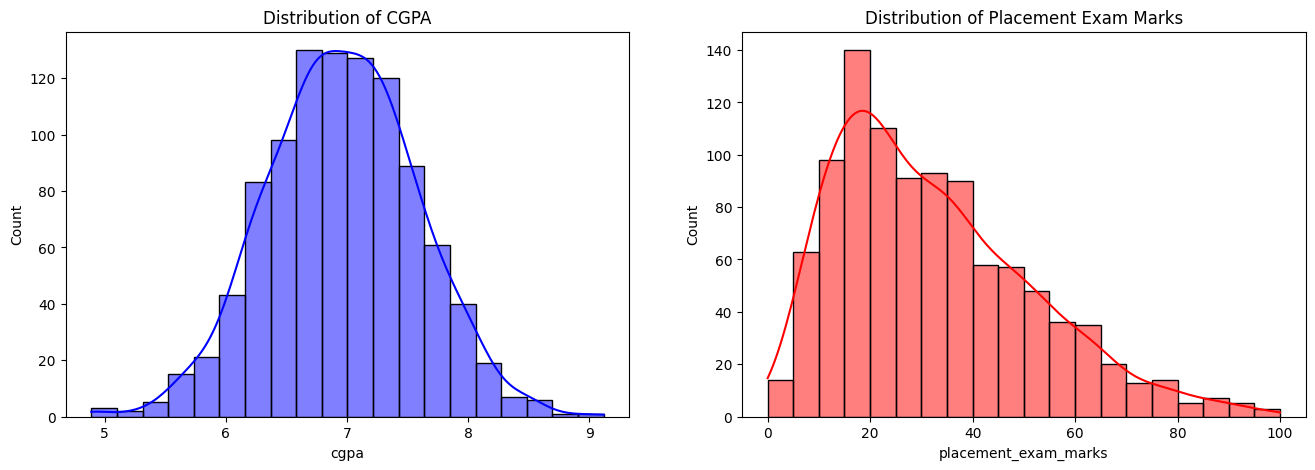

In [47]:
plt.figure(figsize=(16, 5))

# Plot distribution of CGPA
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True, bins=20, color='blue')
plt.title('Distribution of CGPA')

# Plot distribution of Placement Exam Marks
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True, bins=20, color='red')
plt.title('Distribution of Placement Exam Marks')

plt.show()

In [16]:
# right skewed as the the value is positive
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [17]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

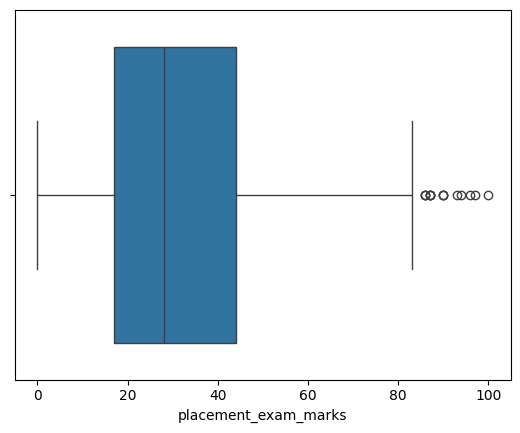

In [20]:

sns.boxplot(x=df['placement_exam_marks'])

In [21]:
#finding IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
percentile25,percentile75

(np.float64(17.0), np.float64(44.0))

In [25]:
IQR=percentile75-percentile25

In [26]:
IQR

np.float64(27.0)

In [28]:
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR
print(upper_limit,lower_limit)

84.5 -23.5


In [29]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [30]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [88]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [89]:
new_df.shape

(985, 3)

In [90]:
new_df[new_df['placement_exam_marks']>82]

,cgpa,placement_exam_marks,placed
403,6.71,83.0,0


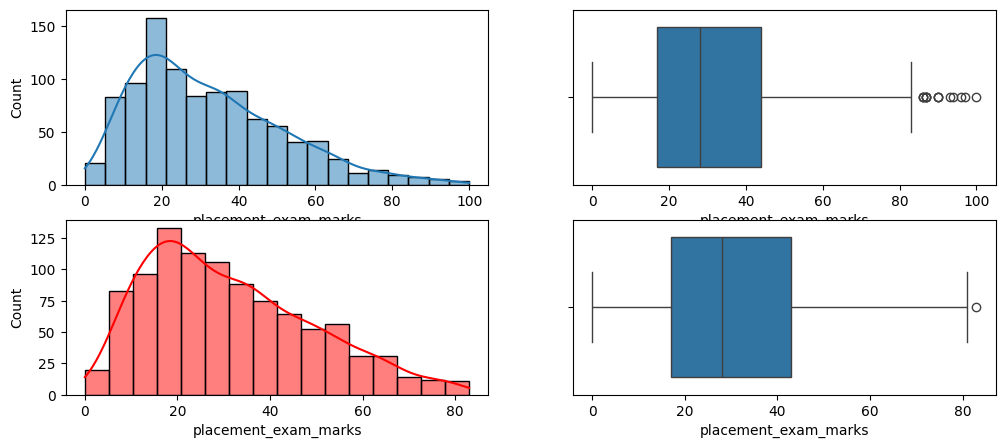

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

### Capping

In [48]:
new_df_cap=df.copy()

In [49]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [50]:
new_df_cap.shape

(1000, 3)

In [65]:
new_df_cap[new_df_cap['placement_exam_marks']==upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,84.5,1
40,6.60,84.5,1
61,7.51,84.5,0
134,6.33,84.5,0
162,7.80,84.5,0
283,7.09,84.5,0
290,8.38,84.5,0
311,6.97,84.5,1
324,6.64,84.5,0
630,6.56,84.5,1


In [66]:
#np.where(condtion,true,false)

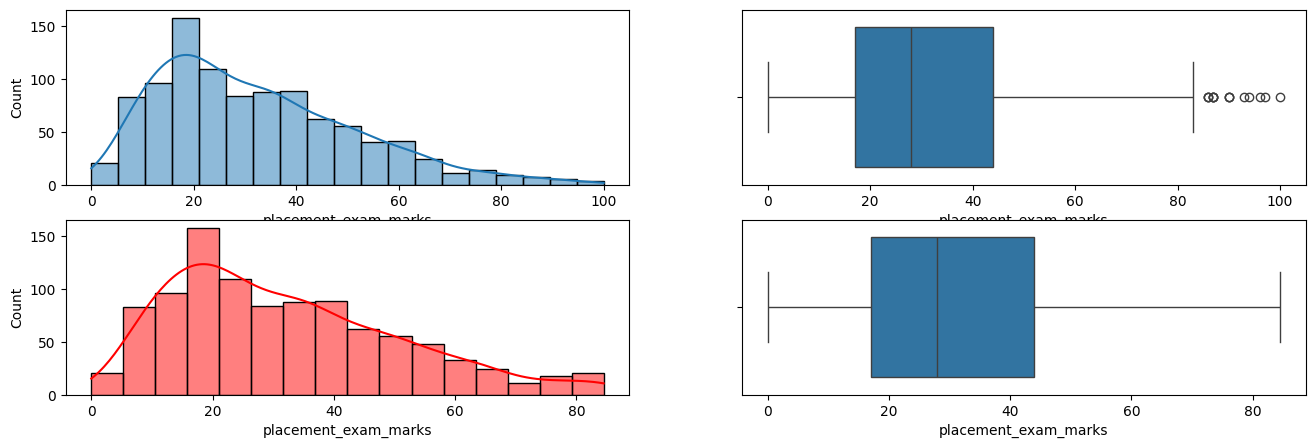

In [72]:
plt.figure(figsize=(16,5))
           
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])


plt.show()